# 선형 회귀 실습

In [1]:
import numpy as np

# x 값과 y 값
x = [2, 4, 6, 8] # 공부한 시간
y = [81, 93, 91, 97] # 시험 점수

In [2]:
# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)

print(f'x의 평균 {mx}')
print(f'y의 평군 {my}')

x의 평균 5.0
y의 평군 90.5


In [9]:
# 기울기 공식의 분모
divisor = sum([(mx - i) ** 2 for i in x])

print(f'분모 : {divisor}')

분모 : 20.0


In [10]:
# 기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    
    return d

dividend = top(x, mx, y, my)

print(f'분자 : {dividend}')

분자 : 46.0


In [11]:
# 기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx * a)

In [12]:
# 출력으로 확인
print('기울기 :', a)
print('y 절편 :', b)

기울기 : 2.3
y 절편 : 79.0


# 선형 회귀 실습 2

In [1]:
import numpy as np

In [2]:
# 기울기 a와 y 절편 b
fake_a_b = [3, 76]

# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

In [3]:
# y=ax+b에 a와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
    return fake_a_b[0] * x + fake_a_b[1]

# MSE 함수
def mse(y, y_hat):
    return ((y-y_hat) ** 2).mean()

# MSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))

In [4]:
# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한 번씩 대입하여
for i in range(len(x)):
    # predict_result 리스트를 완성
    predict_result.append(predict(x[i]))
    print("공부한 시간=%.f, 실제 점수=%.f, 예측 점수=%.f" % (x[i], y[i], predict(x[i])))

공부한 시간=2, 실제 점수=81, 예측 점수=82
공부한 시간=4, 실제 점수=93, 예측 점수=88
공부한 시간=6, 실제 점수=91, 예측 점수=94
공부한 시간=8, 실제 점수=97, 예측 점수=100


In [5]:
# 최종 MSE 출력
print('mse 최종값 : ' + str(mse_val(predict_result, y)))

mse 최종값 : 11.0


# 경사 하강법 실습

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 공부한 시간 X와 Y의 리스트를 만들기
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

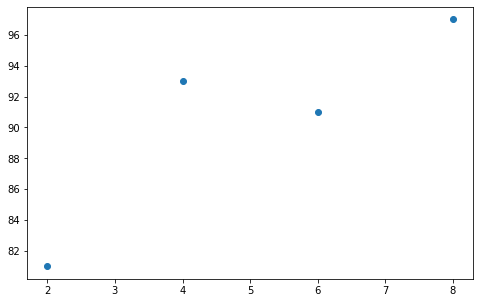

In [9]:
# 그래프로 나타내기
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

In [10]:
# 리스트로 되어 있는 x와 y 값을 넘파이 배열로 바꾸기
# 인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함
x_data = np.array(x)
y_data = np.array(y)

In [13]:
# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률 정하기 
lr = 0.03

# 몇 번 반복될지 설정
epochs = 2001

In [14]:
# 경사 하강법 시작
for i in range(epochs): # 에포크 수만큼 반복
    y_pred = a * x_data + b # 오차 함수인 y=ax+b를 정의한 부분
    error = y_data - y_pred # 실제값 - 예측값, 즉 오차를 구하는 식
    
    # 오차 함수(평균 제곱 오차)를 a로 미분한 값
    a_diff = -(2/len(x_data)) * sum(x_data * error)
    # 오차 함수(평균 제곱 오차)를 b로 미분한 값
    b_diff = -(2/len(x_data)) * sum(error)
    
    a = a - lr * a_diff # 학습률을 곱해 기존의 a 값 업데이트
    b = b - lr * b_diff # 학습률을 곱해 기존의 b 값 업데이트
    
    if i % 100 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


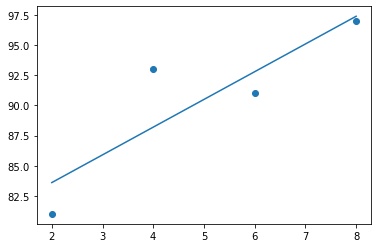

In [15]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

# 다중 선형 회귀 실습

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3D 그래프 그리는 라이브러리

In [33]:
# 공부한 시간 X와 Y의 리스트 만들기
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

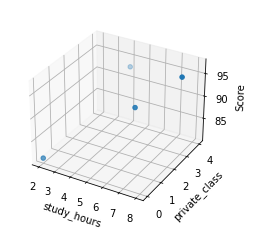

In [34]:
# 그래프로 확인
ax = plt.axes(projection='3d') # 그래프 유형 정하기
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

In [35]:
# 리스트로 되어 있는 x와 y 값을 넘파이 배열로 바꾸기
# 인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [36]:
# 기울기 a와 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

# 학습률 정하기 
lr = 0.02

# 몇 번 반복될지 설정
# 0부터 세므로 원하는 반복 횟수에 +1
epochs = 2001

In [37]:
# 경사 하강법 시작
for i in range(epochs): # 에포크 수만큼 반복
    y_pred = a1 * x1_data + a2 * x2_data + b # 오차 함수인 y=a1x1 + a2x2 + b를 정의한 부분
    error = y_data - y_pred # 실제값 - 예측값, 즉 오차를 구하는 식
    
    # 오차 함수(평균 제곱 오차)를 a1로 미분한 값
    a1_diff = -(2/len(x1_data)) * sum(x1_data * error)
    # 오차 함수(평균 제곱 오차)를 a2로 미분한 값
    a2_diff = -(2/len(x2_data)) * sum(x2_data * error)
    # 오차 함수(평균 제곱 오차)를 b로 미분한 값
    b_diff = -(2/len(x1_data)) * sum(error)
    
    a1 = a1 - lr * a1_diff # 학습률을 곱해 기존의 a1 값 업데이트
    a2 = a2 - lr * a2_diff # 학습률을 곱해 기존의 a2 값 업데이트
    b = b - lr * b_diff # 학습률을 곱해 기존의 b 값 업데이트
    
    if i % 100 == 0:
        print("epoch=%.f,기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0,기울기1=18.5600, 기울기2=8.4500, 절편=3.6200
epoch=100,기울기1=7.2994, 기울기2=4.2867, 절편=38.0427
epoch=200,기울기1=4.5683, 기울기2=3.3451, 절편=56.7901
epoch=300,기울기1=3.1235, 기울기2=2.8463, 절편=66.7100
epoch=400,기울기1=2.3591, 기울기2=2.5823, 절편=71.9589
epoch=500,기울기1=1.9546, 기울기2=2.4427, 절편=74.7362
epoch=600,기울기1=1.7405, 기울기2=2.3688, 절편=76.2058
epoch=700,기울기1=1.6273, 기울기2=2.3297, 절편=76.9833
epoch=800,기울기1=1.5673, 기울기2=2.3090, 절편=77.3948
epoch=900,기울기1=1.5356, 기울기2=2.2980, 절편=77.6125
epoch=1000,기울기1=1.5189, 기울기2=2.2922, 절편=77.7277
epoch=1100,기울기1=1.5100, 기울기2=2.2892, 절편=77.7886
epoch=1200,기울기1=1.5053, 기울기2=2.2875, 절편=77.8209
epoch=1300,기울기1=1.5028, 기울기2=2.2867, 절편=77.8380
epoch=1400,기울기1=1.5015, 기울기2=2.2862, 절편=77.8470
epoch=1500,기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1600,기울기1=1.5004, 기울기2=2.2859, 절편=77.8543
epoch=1700,기울기1=1.5002, 기울기2=2.2858, 절편=77.8556
epoch=1800,기울기1=1.5001, 기울기2=2.2858, 절편=77.8563
epoch=1900,기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=2000,기울기1=1.5000, 기울기2=2.2857, 절편=77.8569


# 코딩으로 확인하는 로지스틱 회귀

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 공부한 시간 X와 합격 여부 Y의 리스트 만들기
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

(-0.1, 1.1)

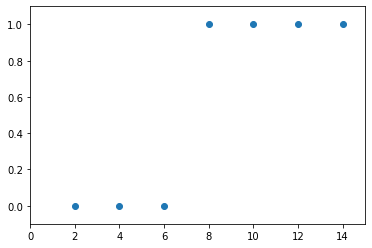

In [25]:
# 그래프로 나타내기
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [26]:
# 기울기 a와 절편 b의 값 초기화
a, b = 0, 0

# 학습률
lr = 0.05

In [27]:
print(x_data, y_data)

[2, 4, 6, 8, 10, 12, 14] [0, 0, 0, 1, 1, 1, 1]


In [28]:
# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

# 경사하강법 실행
# 1000번 반복될 때마다 각 x_data 값에 대한 현재의 a 값, b 값 출력
for i in range(2001): 
    for x_data, y_data in data:
        
        # a에 관한 편미분, 앞서 정의한 sigmoid 함수 사용
        a_diff = x_data * (sigmoid(a * x_data + b) - y_data)
        # b에 관한 편미분
        b_diff = sigmoid(a * x_data + b) - y_data
    
        a = a - lr * a_diff # 학습률을 곱해 기존의 a 값 업데이트
        b = b - lr * b_diff # 학습률을 곱해 기존의 b 값 업데이트
    
        if i % 1000 == 0:
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


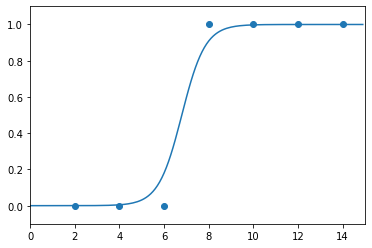

In [29]:
# 앞서 구한 기울기와 절편을 이용해 그래프 그리기
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]


plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) # 그래프로 나타낼 x 값의 범위 정하기
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()